In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import nltk
from nltk import tokenize

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

df = pd.read_csv("/Users/nehayadav/Downloads/quora_duplicate_questions.tsv",delimiter="\t").fillna("")
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


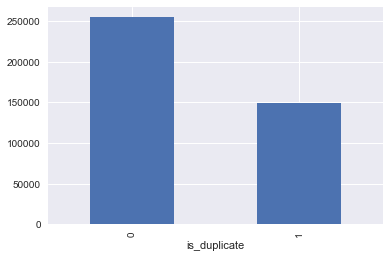

In [18]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [2]:
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()

df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)
average_word_share = df["word_share"].mean()
average_q1_n_words = df["q1_n_words"].mean()
average_q2_n_words = df["q2_n_words"].mean()
print ("Average words share is: {}".format(average_word_share))
print("Average number of words in question 1: {}".format(average_q1_n_words)) 
print("Average number of words in question 2: {}".format(average_q2_n_words)) 
print("Number of duplicates(1) and non duplicates(0) in the dataSet")
print df['is_duplicate'].value_counts()
print('Average number of character length of q1: {}'.format(df["q1len"].mean()))
print('Average number of character length of q2: {}'.format(df["q2len"].mean()))
print("Maximum number of characters in q1:{}".format(df["q1len"].max()))
print("Maximum number of characters in q2:{}".format(df["q2len"].max()))
print("Minimum number of characters in q1:{}".format(df["q2len"].min()))
print("Minimum number of characters in q2:{}".format(df["q2len"].min()))
df.head()

Average words share is: 0.223361913502
Average number of words in question 1: 10.9445917534
Average number of words in question 2: 11.1851195924
Number of duplicates(1) and non duplicates(0) in the dataSet
0    255027
1    149263
Name: is_duplicate, dtype: int64
Average number of character length of q1: 59.5767790447
Average number of character length of q2: 60.143305548
Maximum number of characters in q1:623
Maximum number of characters in q2:1169
Minimum number of characters in q1:0
Minimum number of characters in q2:0


,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000


In [22]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'], color = 'blue')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'], color = 'red')

In [3]:
from IPython.display import display, HTML
df['q_n_words_avg'] = np.round((df['q1_n_words'] + df['q2_n_words'])/2.0).astype(int)
print(df['q_n_words_avg'].max())
df.head()


135


,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_share,q_n_words_avg
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,0.434783,13
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,0.200000,10
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,0.166667,12
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0.000000,10
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,0.100000,10


In [7]:
df_subsampled = df[0:5000]

trace = go.Scatter(
    y = df_subsampled['q1_n_words'].values,
    x = df_subsampled['q2_n_words'].values,
    mode='markers',
    marker=dict(
        size= df_subsampled['word_share'].values * 60,
        color = df_subsampled['is_duplicate'].values,
        colorscale='Portland',
        showscale=True,
        opacity=0.5,
        colorbar = dict(title = 'duplicate')
    ),
    text = np.round(df_subsampled['word_share'].values, decimals=2)
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Scatter plot of number of words in q1 and q2',
    hovermode= 'closest',
        xaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title= 'Question 2 length',
        ticklen= 5,
        gridwidth= 2,
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterWords')